In [1]:
from tqdm import tqdm
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.models import resnet18
import torchvision.transforms as transforms
import numpy as np
from torchvision.transforms import Compose, Resize, ToTensor, Normalize, Lambda
import torch.nn.functional as F


# from utils.main import get_data_loader, ModifiedResNet18, train_model, infer

# 1. Plot energies vs. epoch for the specific class when energy is just logit

In [2]:
cls = 1

In [3]:
saved_energies = torch.load('saved_samples/no-unnormalization-run/last_energies.pt')
saved_energies.shape

torch.Size([451, 11, 10])

In [4]:
saved_samples = torch.load('saved_samples/no-unnormalization-run/last_samples.pt')
saved_samples.shape

torch.Size([451, 11, 784])

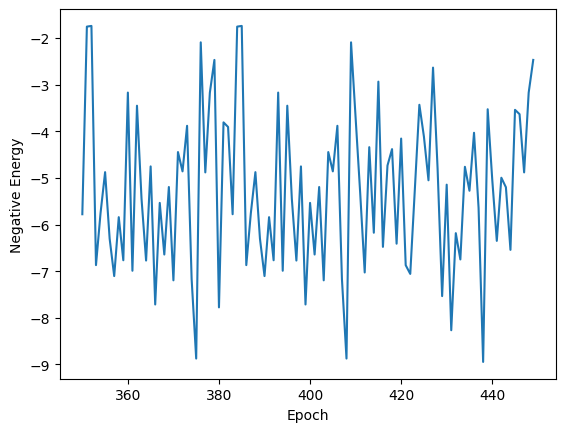

In [5]:
plt.xlabel('Epoch')
plt.ylabel('Negative Energy')
plt.plot(np.arange(350,450), saved_energies[350:450,:, cls].mean(axis=-1).detach().numpy())

# 2. Plot likelihood vs. epoch for the specific class when energy is just logit

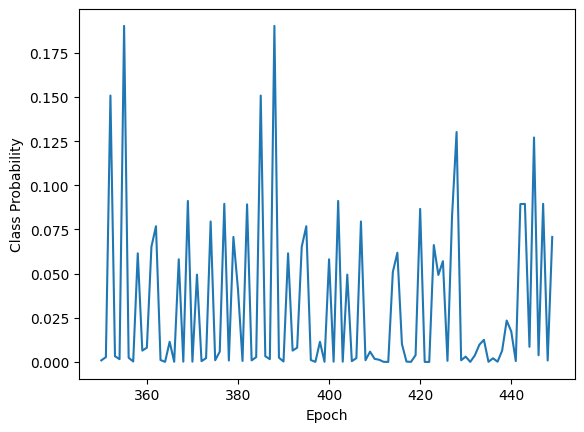

In [8]:
sftmax_vectors = nn.Softmax(dim=-1)(saved_energies)
plt.xlabel('Epoch')
plt.ylabel('Class Probability')
plt.plot(np.arange(350,450),(sftmax_vectors[350:450, :, cls]).mean(dim=1).detach().numpy())


# 2.1 plot an example image

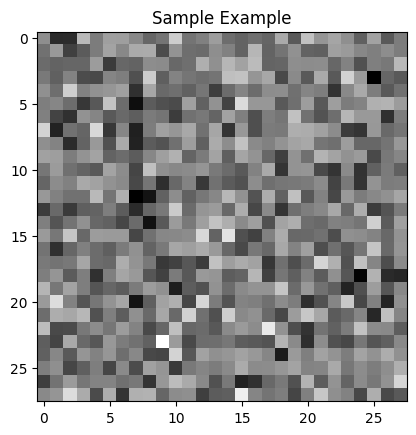

In [9]:
plt.title("Sample Example")
plt.imshow(saved_samples[-1, 0,:].reshape(28, 28, 1), cmap='gray')

# 3. Plot likelihood vs. epoch for the specific class when energy is log likelihood

In [4]:
cls = 0

In [5]:
saved_energies = torch.load('last_energies.pt')
saved_energies.shape

torch.Size([1000, 11, 10])

In [6]:
saved_samples = torch.load('last_samples.pt')
saved_samples.shape

torch.Size([1000, 11, 100])

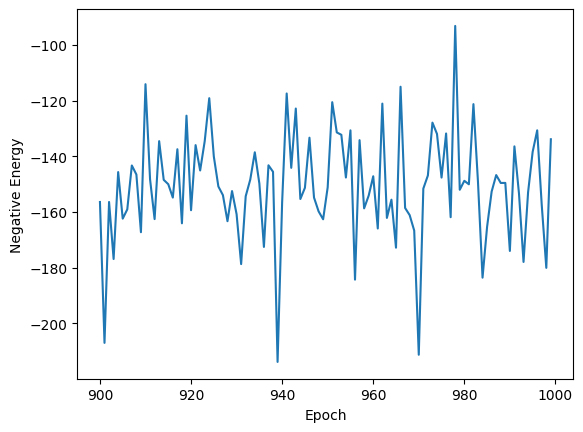

In [7]:
plt.xlabel('Epoch')
plt.ylabel('Negative Energy')
plt.plot(np.arange(900,1000), saved_energies[900:1000,:, cls].mean(axis=-1).detach().numpy())

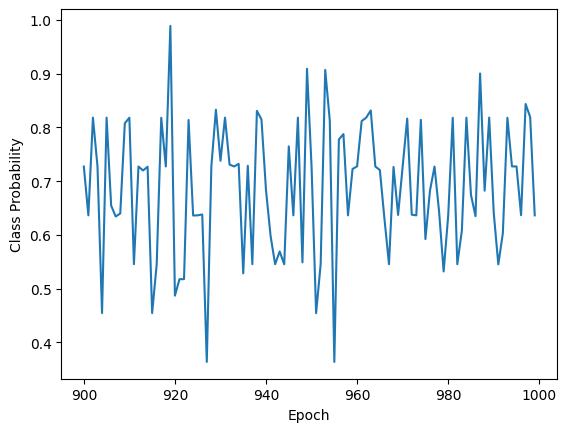

In [11]:
sftmax_vectors = nn.Softmax(dim=-1)(saved_energies)
plt.xlabel('Epoch')
plt.ylabel('Class Probability')
plt.plot(np.arange(900,1000),(sftmax_vectors[900:1000, :, 7]).mean(dim=1).detach().numpy())

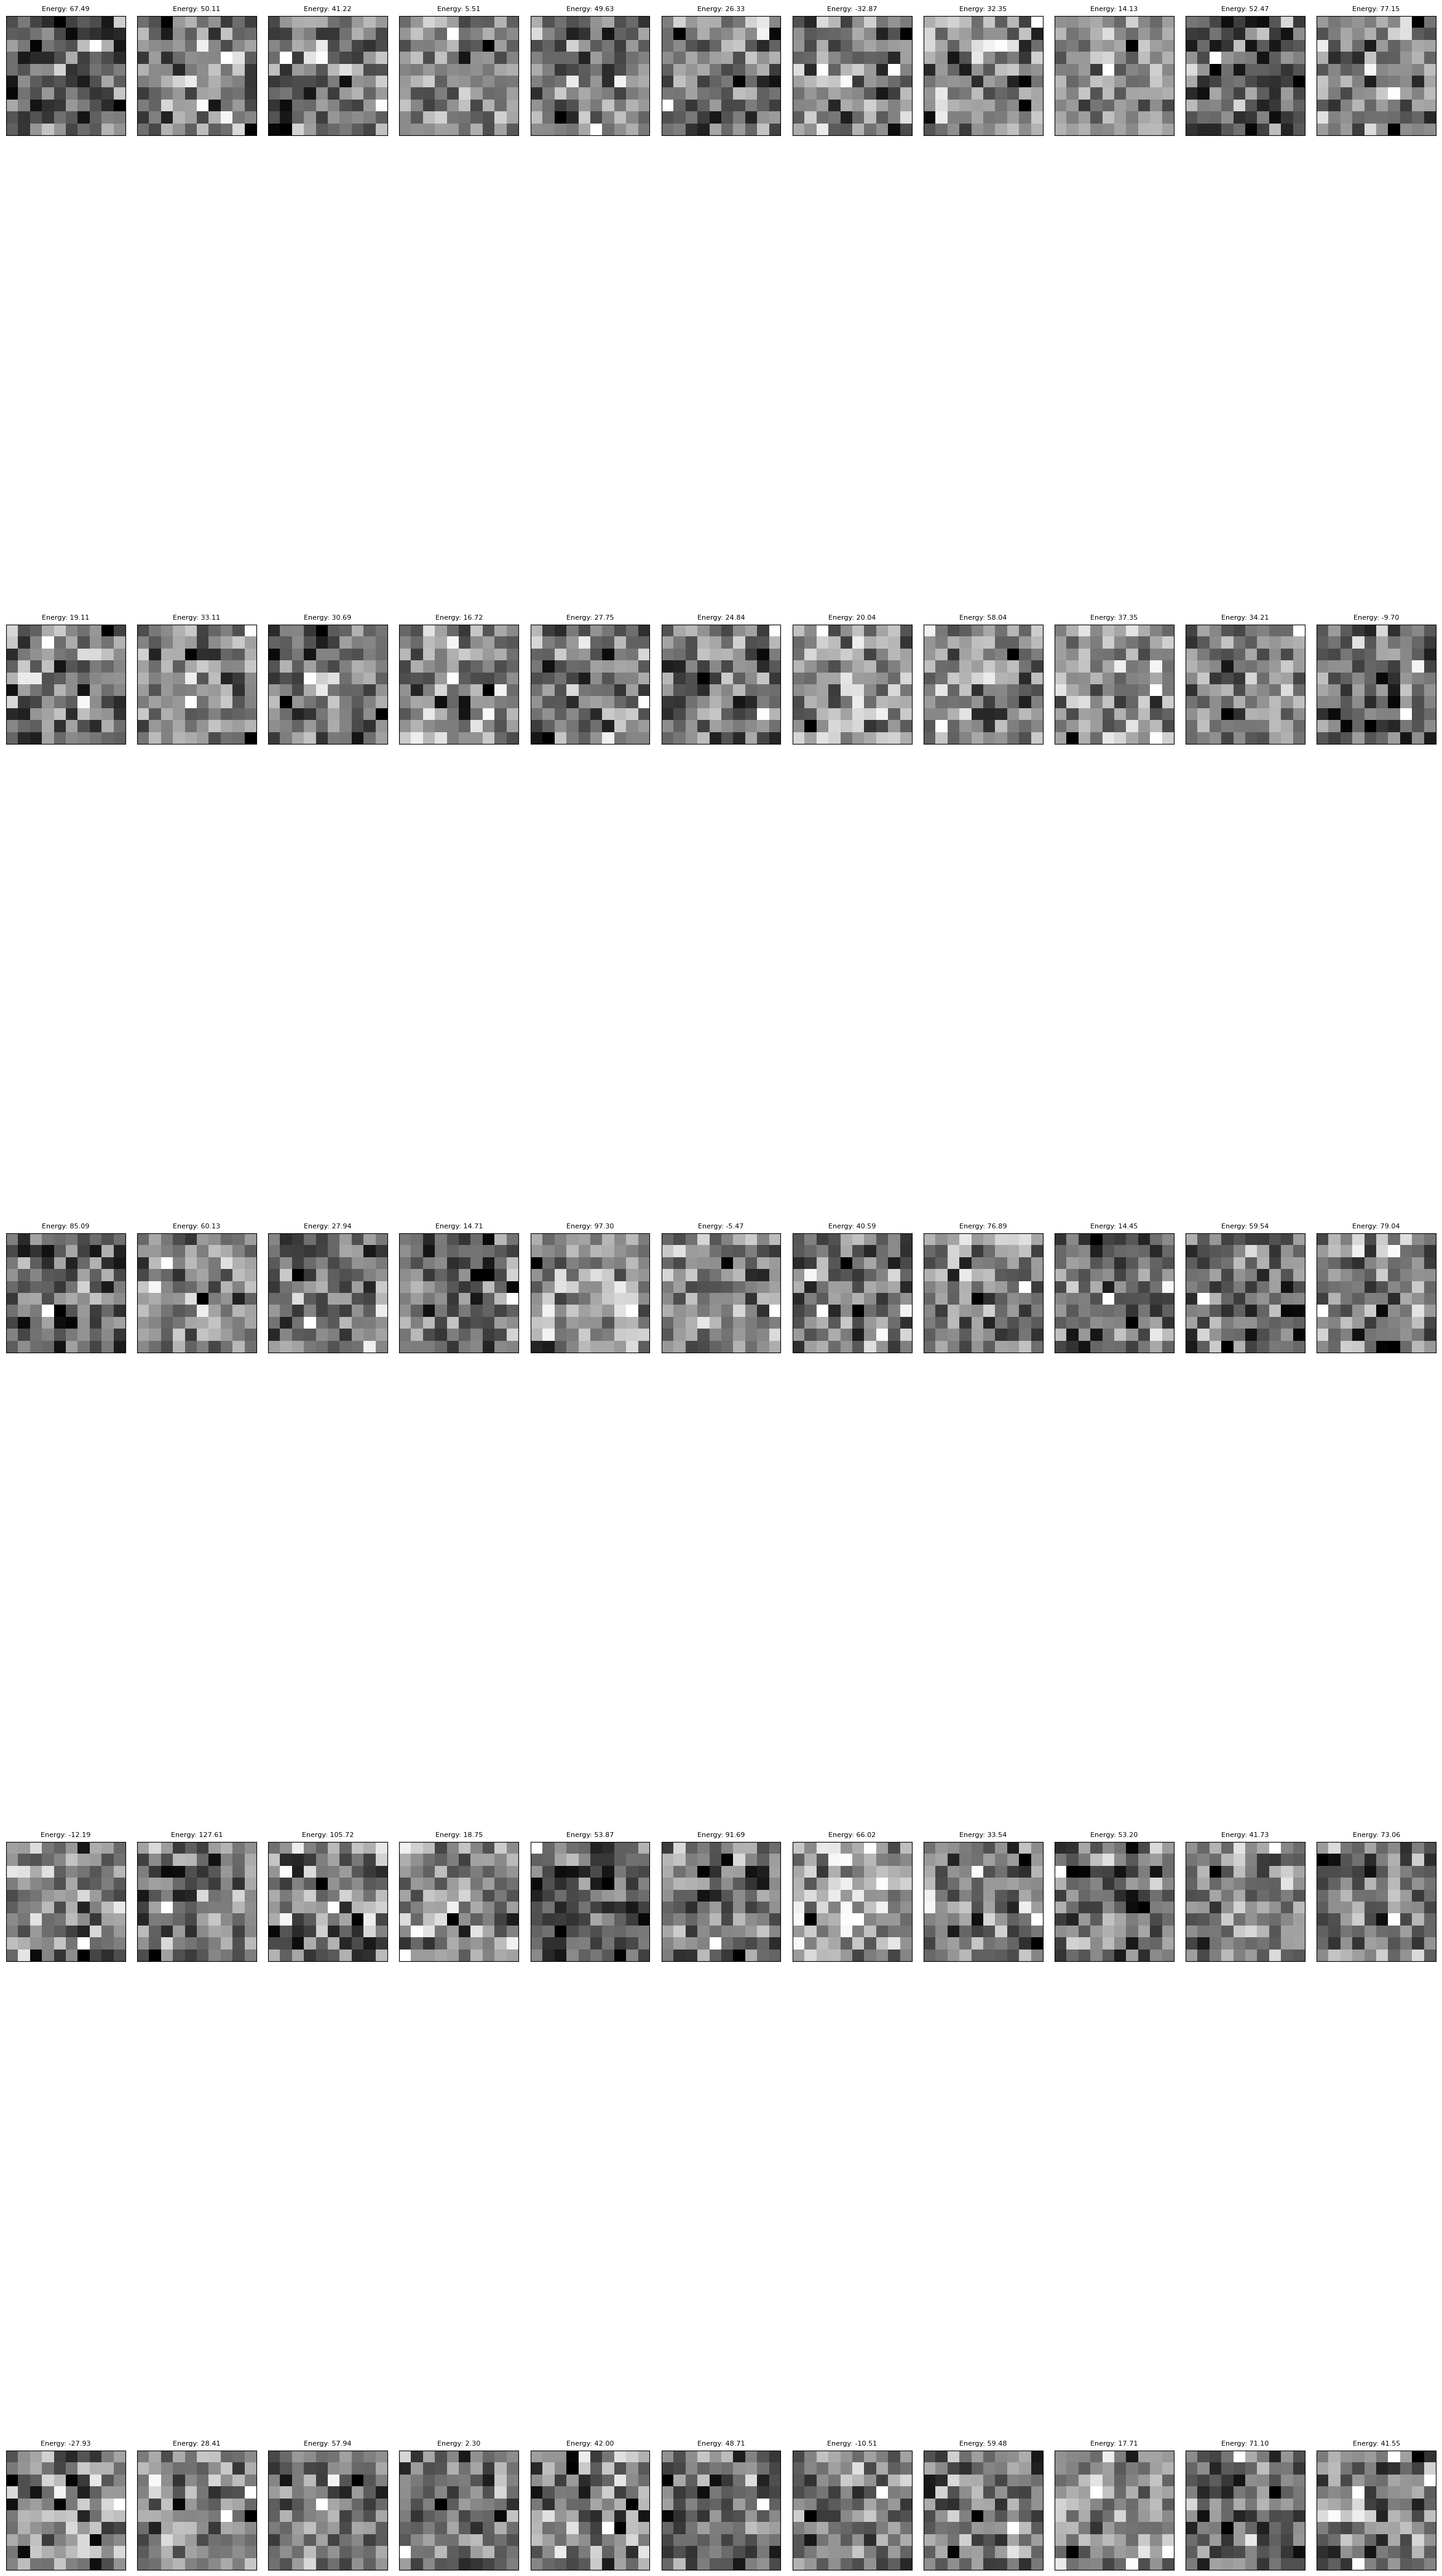

Saved plot to output.png


In [10]:
import matplotlib.pyplot as plt
import torch

# Example tensors
samples__ = saved_samples[995:1000]  # Simulating random data; replace with your tensor
energies__ = saved_energies[995:1000, :, 7]      # Simulating random energies; replace with your tensor

def display_images_and_energies(samples, energies, filename="output.png"):
    # Ensure the samples are reshaped into 28x28 for display
    images = samples__.view(-1, 10, 10)  # Reshape to (260, 28, 28) assuming 26*10 samples
    energies_flat = energies__.view(-1)  # Flatten the energies to match the images

    fig, axes = plt.subplots(nrows=5, ncols=11, figsize=(30, 60))  # Adjust size as needed
    fig.subplots_adjust(hspace=0.5, wspace=0.1)

    for i, ax in enumerate(axes.flat):
        # Display image
        ax.imshow(images[i], cmap='gray')
        # Title with corresponding energy
        ax.set_title(f'Energy: {energies_flat[i]:.2f}', fontdict={'fontsize': 8})
        ax.set_xticks([])
        ax.set_yticks([])

    plt.savefig(filename, dpi=300)  # Save the figure to a file
    plt.show()
    plt.close(fig)  # Close the figure window to free up memory
    print(f"Saved plot to {filename}")

# Call the function with your data and specify a filename
display_images_and_energies(samples__, energies__, filename="output.png")